In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [3]:
data = pd.read_csv("ToyotaCorolla.csv",encoding="unicode_escape")

In [4]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
data = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [6]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<Axes: >

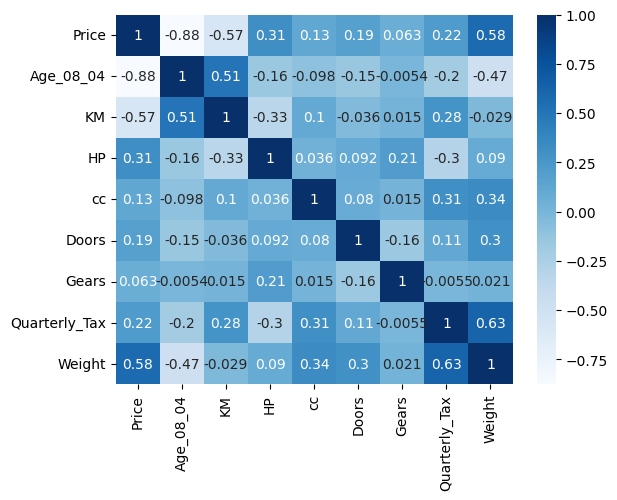

In [9]:
sns.heatmap(data.corr(),annot=True,cmap="Blues")

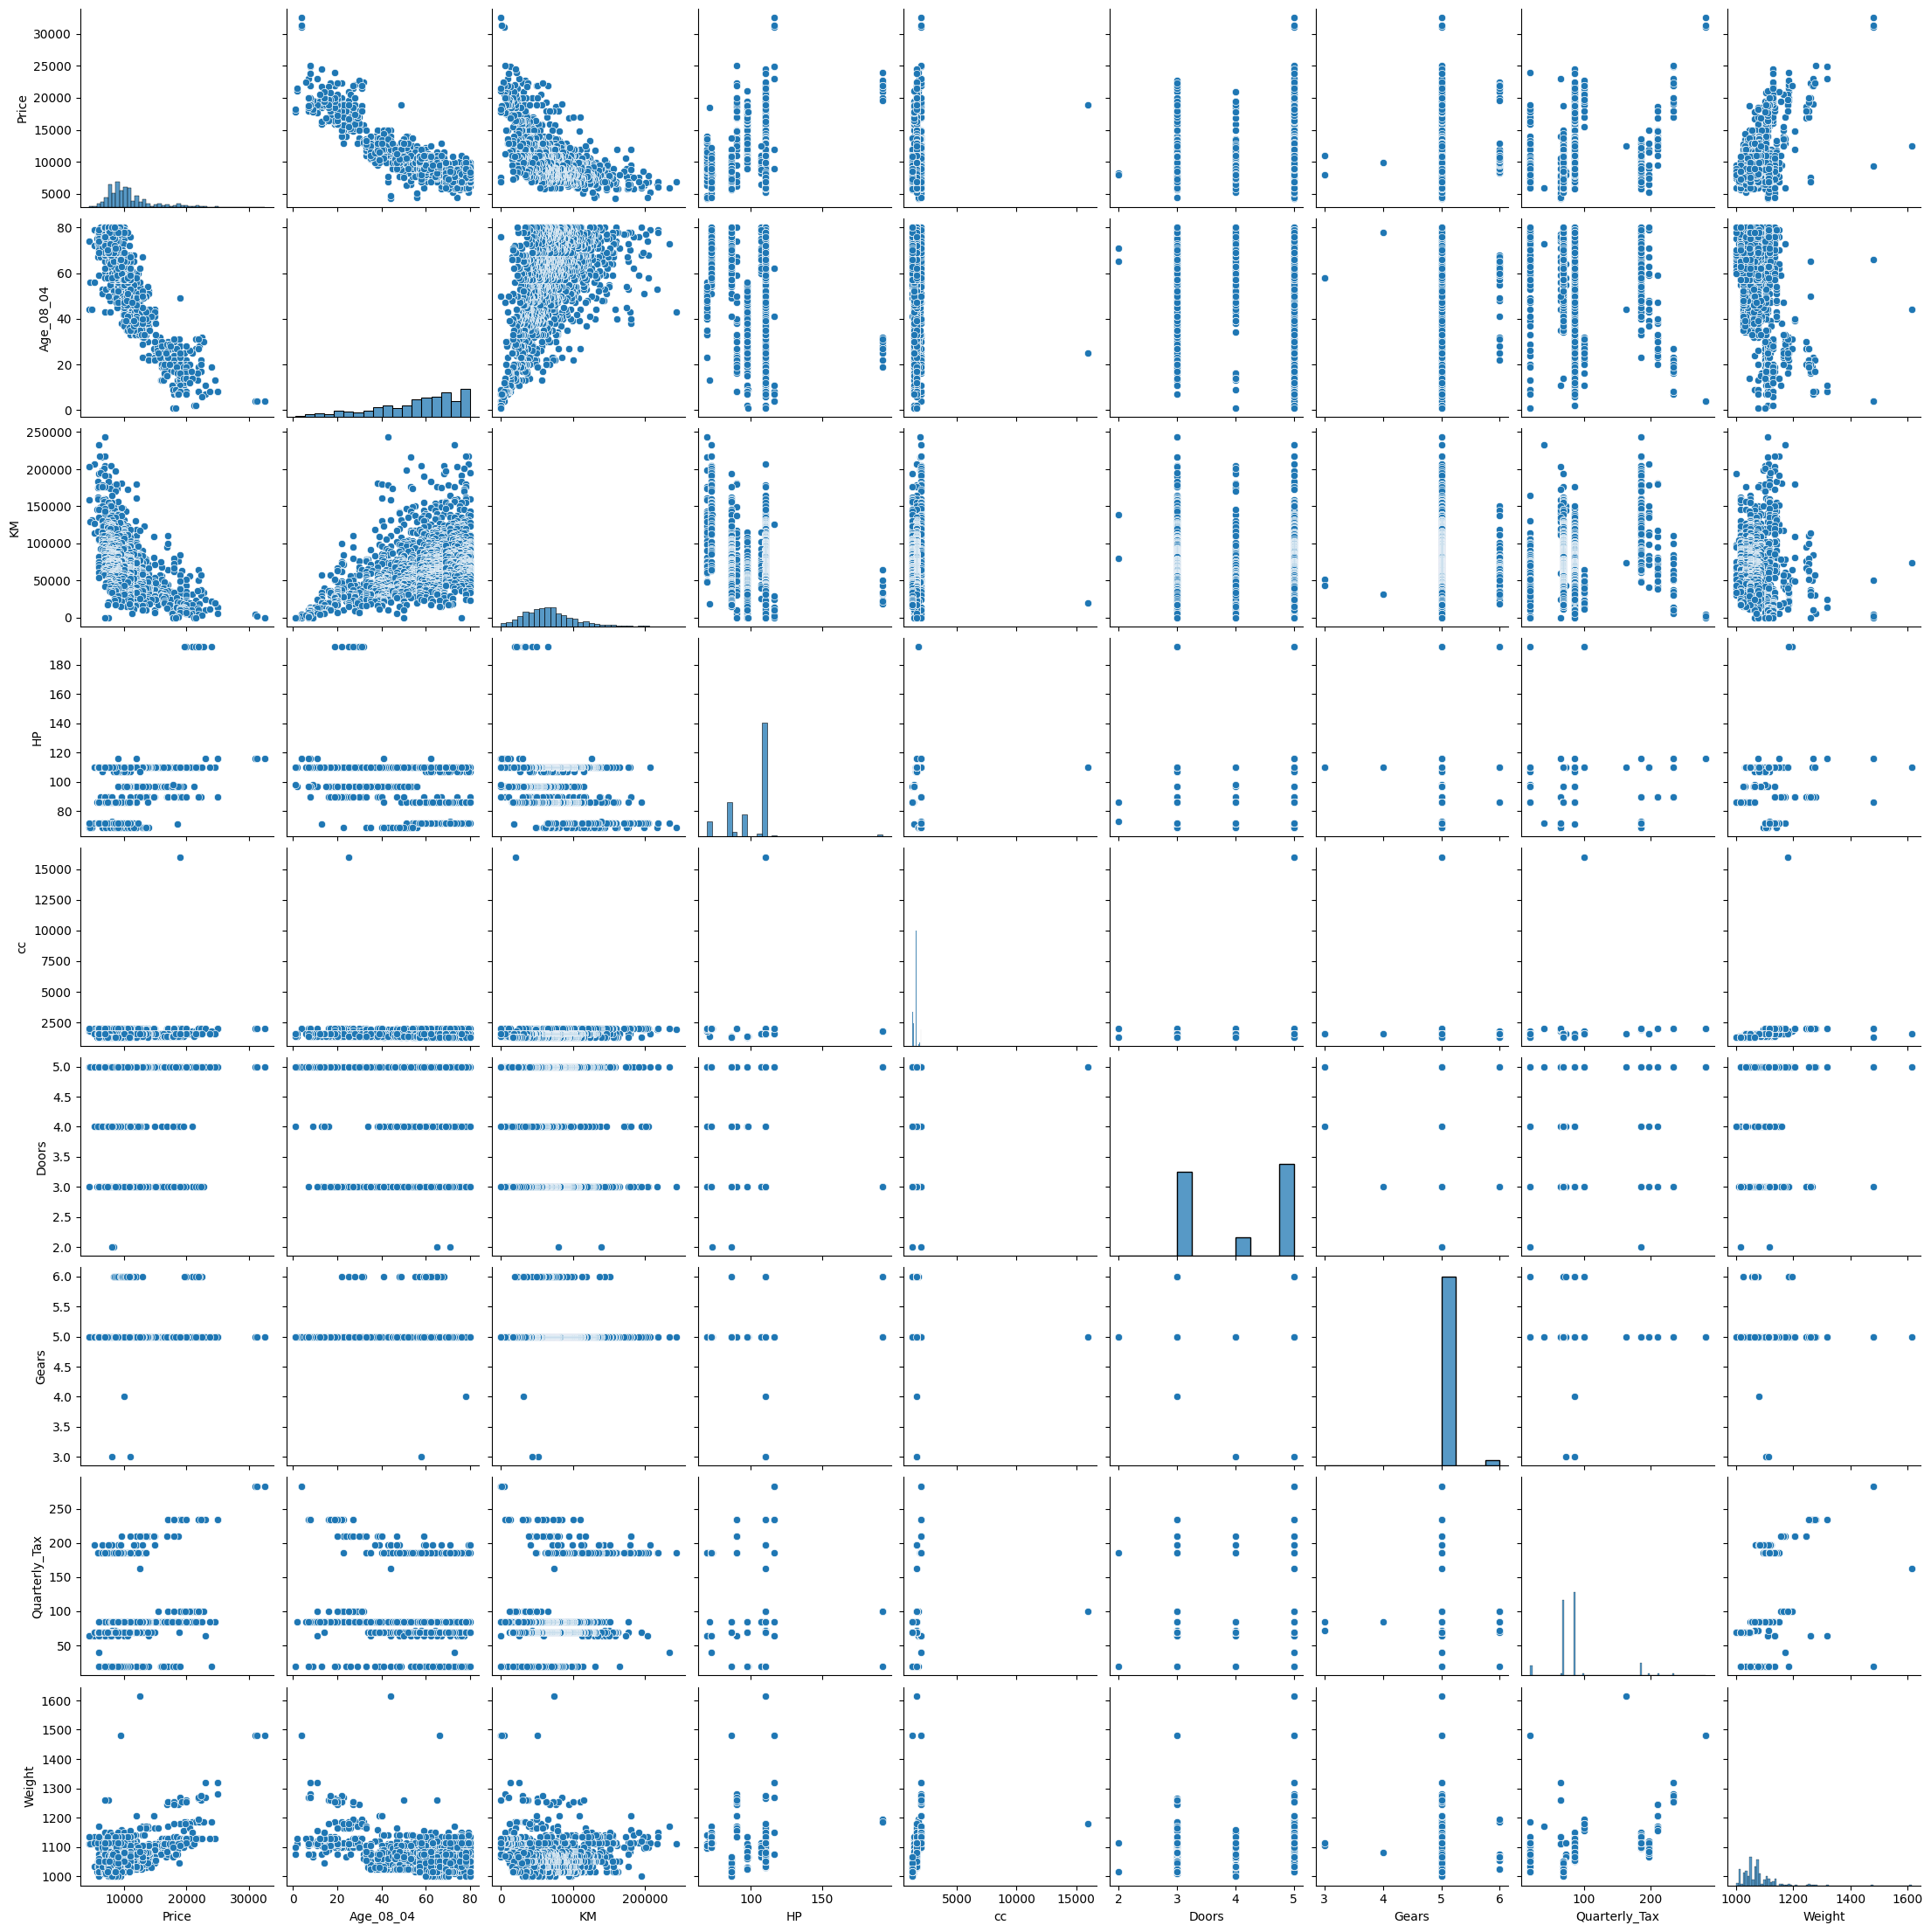

In [10]:
sns.pairplot(data)

In [11]:
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:21:55   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-95-943bd0fbba03>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


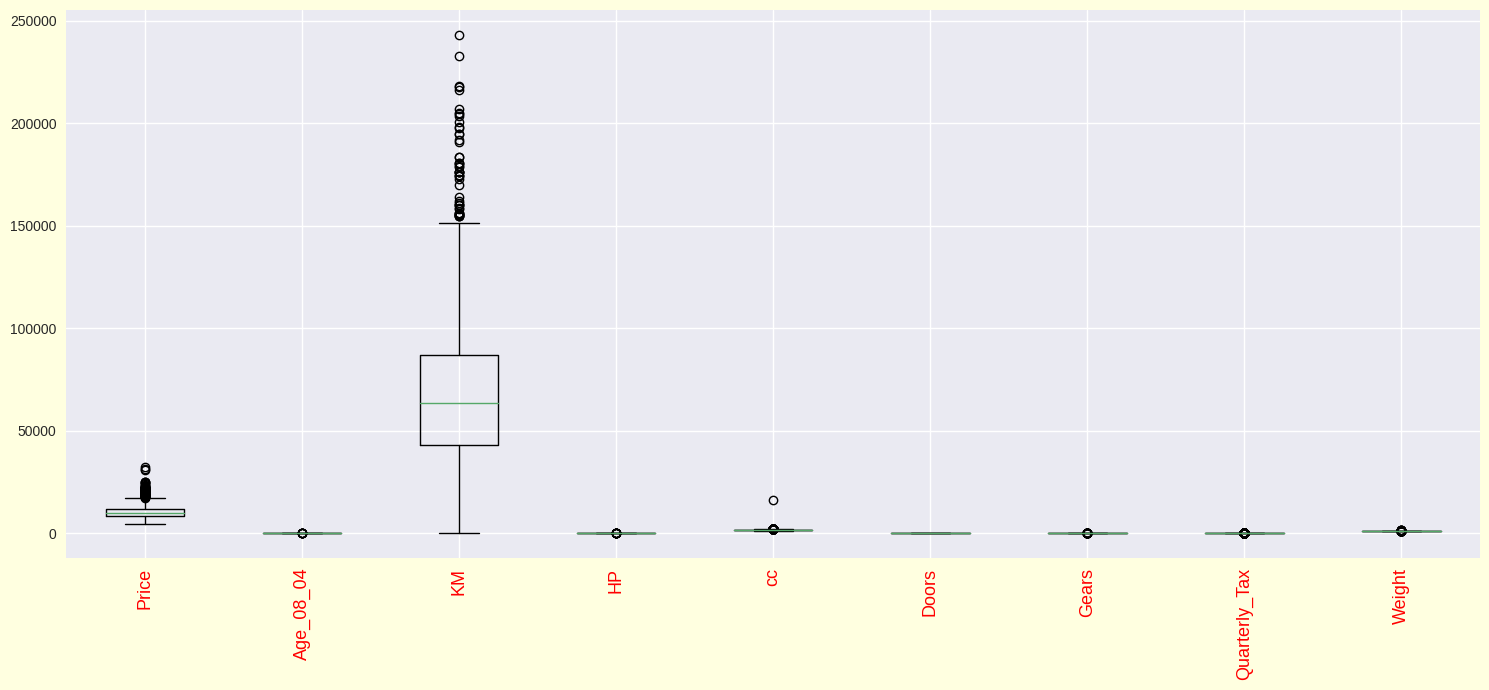

In [95]:
data_names = data.columns.tolist()

plt.figure(figsize=(15,7),facecolor="lightyellow")
plt.style.use("seaborn")
plt.boxplot(data)
plt.xticks(range(1,len(data_names)+1),data_names,rotation=90,color="red",size=13)
plt.tight_layout()

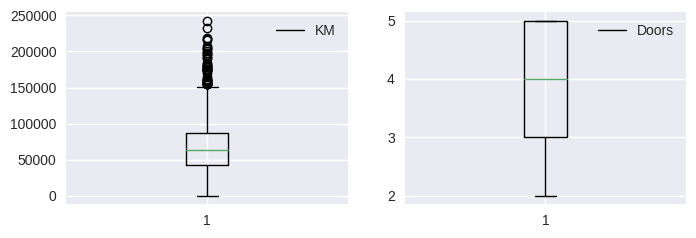

In [13]:
plt.subplot(2,2,1)
plt.boxplot(data["KM"])
plt.legend(["KM"],loc="best")
plt.subplot(2,2,2)
plt.boxplot(data["Doors"])
plt.legend(["Doors"],loc="best")

In [23]:
rsq_age=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=data).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=data).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=data).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','cc','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df


,Variables,Vif
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


In [ ]:
df = MinMaxScaler().fit_transform(data)

In [ ]:
df=pd.DataFrame(df)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8
0,0.325044,0.278481,0.193355,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
1,0.333925,0.278481,0.300149,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
2,0.341030,0.291139,0.171647,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
3,0.376554,0.316456,0.197528,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
4,0.333925,0.367089,0.158433,0.170732,0.047619,0.333333,0.666667,0.723485,0.276423


In [ ]:
data.sample()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
314,9950,43,37576,97,1400,3,5,69,1030


<ipython-input-99-714d9d354b69>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Price"])
<ipython-input-99-714d9d354b69>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age_08_04"])
<ipython-input-99-714d9d354b69>:6: UserWarning: 

`distplot` is a deprecated function and will be re

<Axes: xlabel='HP', ylabel='Density'>

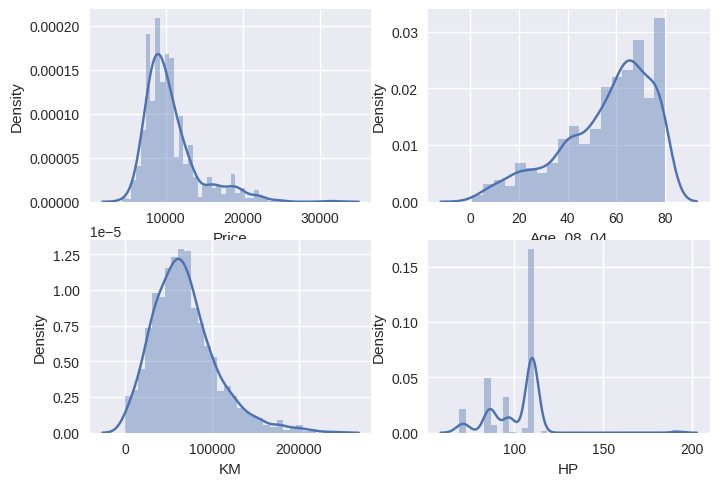

In [ ]:
plt.subplot(2,2,1)
sns.distplot(data["Price"])
plt.subplot(2,2,2)
sns.distplot(data["Age_08_04"])
plt.subplot(2,2,3)
sns.distplot(data["KM"])
plt.subplot(2,2,4)
sns.distplot(data["HP"])


<ipython-input-100-0cbf16dce9f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["cc"])
<ipython-input-100-0cbf16dce9f6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Doors"])
<ipython-input-100-0cbf16dce9f6>:6: UserWarning: 

`distplot` is a deprecated function and will be remove

<Axes: xlabel='Weight', ylabel='Density'>

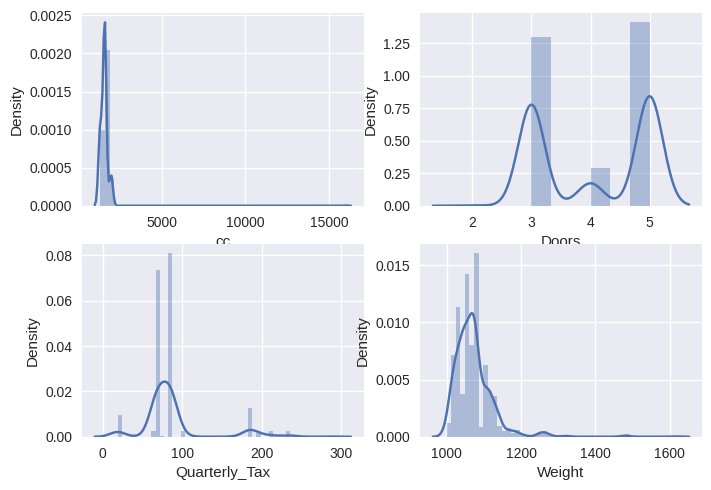

In [ ]:
plt.subplot(2,2,1)
sns.distplot(data["cc"])
plt.subplot(2,2,2)
sns.distplot(data["Doors"])
plt.subplot(2,2,3)
sns.distplot(data["Quarterly_Tax"])
plt.subplot(2,2,4)
sns.distplot(data["Weight"])

In [ ]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [26]:
(c,_)= model.get_influence().cooks_distance

In [27]:
k=9
n=1436
3*k/n

0.018802228412256268

Text(0, 0.5, "cook's Distance")

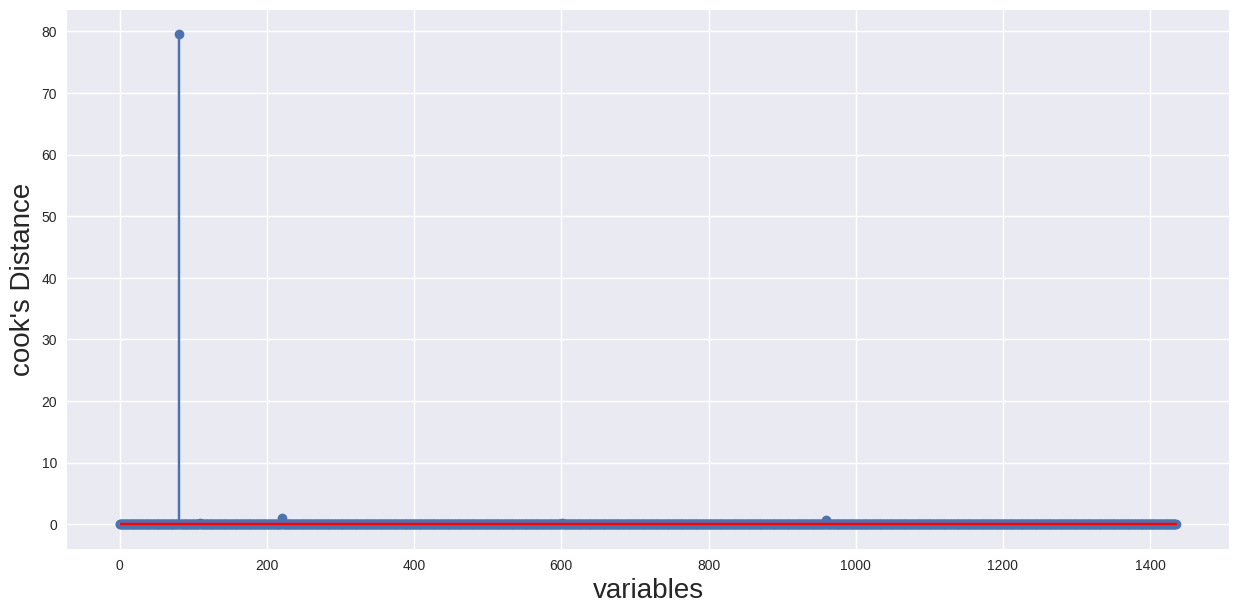

In [30]:
plt.figure(figsize=(15,7))
plt.stem(np.arange(1436),np.round(c,3))
plt.hlines(y=0.018,xmin=0,xmax=len(data),color="r")
plt.xlabel("variables",size=20)
plt.ylabel("cook's Distance",size=20)

In [31]:
np.where(c>=0.018)

(array([  14,   16,   49,   80,  109,  110,  111,  141,  191,  192,  221,
         523,  601,  654,  960,  991, 1058]),)

In [32]:
(np.argmax(c),np.max(c))

(80, 79.52010624141815)

In [40]:
data1 = data.drop([14,16,49,80,109,110,111,141,191,192,221,
         523,601,654,960,991,1058],axis=0)

In [41]:
data1.shape

(1419, 9)

In [42]:
model_new = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data1).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1393.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:00:35   Log-Likelihood:                -12015.
No. Observations:                1419   AIC:                         2.405e+04
Df Residuals:                    1410   BIC:                         2.410e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.44e+04   1490.455     -9.663      0.000   -1.73e+04   -1.15e+04
Age_08_04      -111.4226      2.398    -46.467      0.000    -116.126    -106.719
KM               -0.0175      0.001    -15.347      0.000      -0.020      -0.015
HP               28.9815      2.768     10.472      0.000      23.552      34.410
cc               -3.3519      0.299    -11.216      0.000      -3.938      -2.766
Doors          -131.7533     36.184     -3.641      0.000    -202.733     -60.773
Gears           308.8824    180.506      1.711      0.087     -45.206     662.971
Quarterly_Tax     2.1111      1.358      1.555      0.120      -0.553       4.775
Weight           31.4161      1.395     22.514      0.000      28.679      34.153
==============================================================================
Omnibus:                       47.323   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.233
Skew:                           0.209   Prob(JB):                     2.09e-21
Kurtosis:                       4.198   Cond. No.                     3.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
def standardized_value(vals):
  return (vals-vals.mean())/vals.std()

In [51]:
data.sample()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
132,16250,19,29441,97,1400,5,5,85,1110


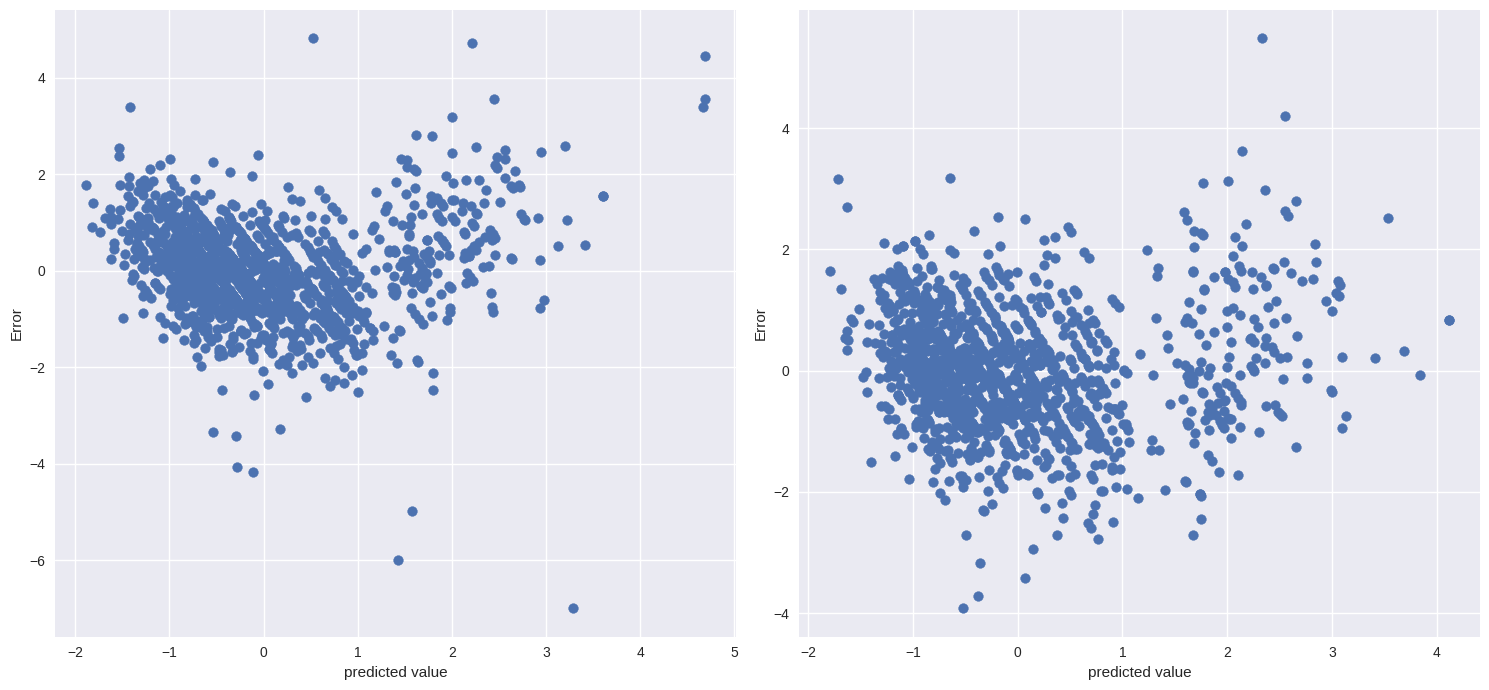

In [50]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(standardized_value(model.fittedvalues),standardized_value(model.resid))
plt.xlabel("predicted value")
plt.ylabel("Error")

plt.subplot(1,2,2)
plt.scatter(standardized_value(model_new.fittedvalues),standardized_value(model_new.resid))
plt.xlabel("predicted value")
plt.ylabel("Error")
plt.tight_layout()

<ipython-input-68-69e1988d97ac>:23: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


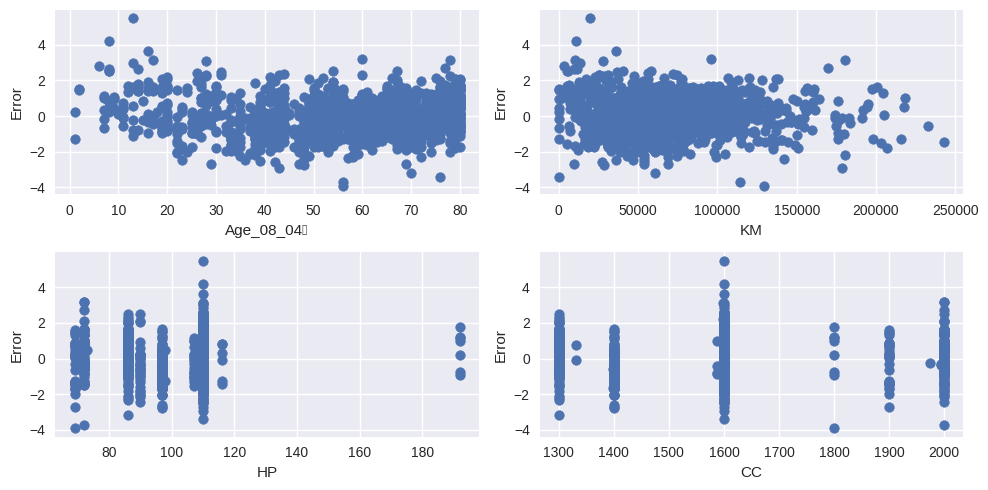

In [68]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.scatter(data1["Age_08_04"],standardized_value(model_new.resid))
plt.xlabel("Age_08_04	")
plt.ylabel("Error")

plt.subplot(2,2,2)
plt.scatter(data1["KM"],standardized_value(model_new.resid))
plt.xlabel("KM")
plt.ylabel("Error")


plt.subplot(2,2,3)
plt.scatter(data1["HP"],standardized_value(model_new.resid))
plt.xlabel("HP")
plt.ylabel("Error")


plt.subplot(2,2,4)
plt.scatter(data1["cc"],standardized_value(model_new.resid))
plt.xlabel("CC")
plt.ylabel("Error")
plt.tight_layout()

<ipython-input-69-41f736a065ac>:23: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()


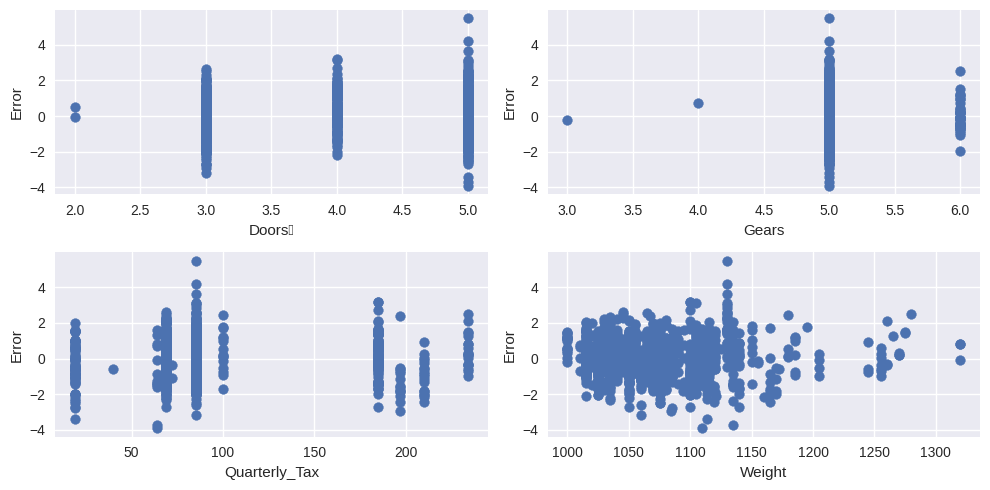

In [69]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.scatter(data1["Doors"],standardized_value(model_new.resid))
plt.xlabel("Doors	")
plt.ylabel("Error")

plt.subplot(2,2,2)
plt.scatter(data1["Gears"],standardized_value(model_new.resid))
plt.xlabel("Gears")
plt.ylabel("Error")


plt.subplot(2,2,3)
plt.scatter(data1["Quarterly_Tax"],standardized_value(model_new.resid))
plt.xlabel("Quarterly_Tax")
plt.ylabel("Error")


plt.subplot(2,2,4)
plt.scatter(data1["Weight"],standardized_value(model_new.resid))
plt.xlabel("Weight")
plt.ylabel("Error")
plt.tight_layout()

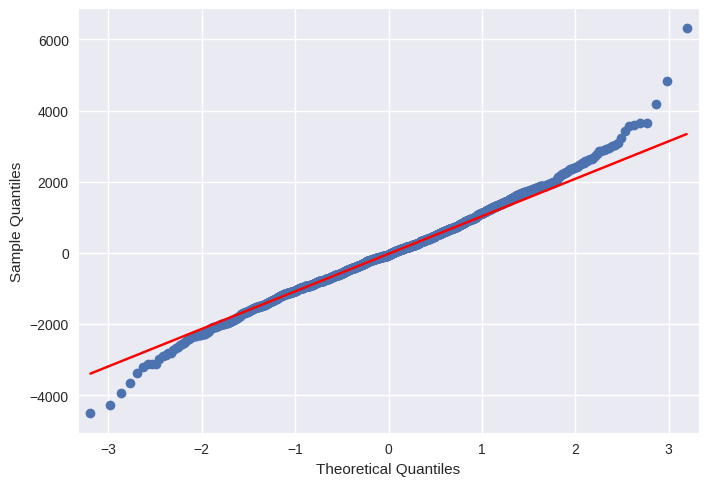

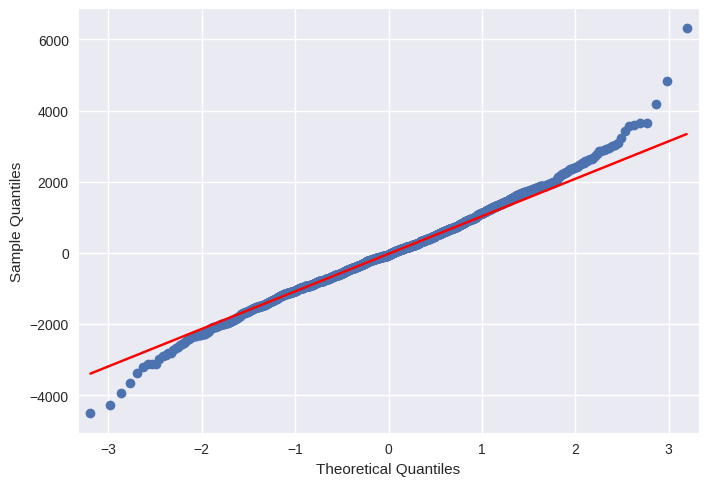

In [74]:
sm.qqplot(model_new.resid,line="q")

In [91]:
result = {"MODEL":["Model old","Model new"],"R Square":[model.rsquared,model_new.rsquared]}
pd.DataFrame(result)

,MODEL,R Square
0,Model old,0.863763
1,Model new,0.887666
